Initial version

In [1]:
!pip install datasets
!pip install transformers
!pip install deepxde

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.7/493.7 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 30.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 48.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 97.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 75.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 35.7 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.19.0
    Uninstalling huggingface-hub-0.19.0:
      Successfully uninstalled huggingface-hub-0.19.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.2/166.2 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 12.5 MB/s eta 0

##Using  neural networks to function approximation




In [156]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

In [345]:
# Define a simple neural network class
class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size1,hidden_size2, output_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size2, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        return x

In [353]:
# Define a function to generate both training and test data
def generate_data(function_type,num_samples, test_ratio=0.5):
    # Generate random 1D data
    X = 10* (2 * torch.rand(num_samples, 1) - 1)

    #print(f'Generated data: {X}')

    # Example cubic function for training data
    if function_type == 'cubic':
        Y = 2 * X**3 + 3 * X**2 + 1
    elif function_type == 'sin':
        Y = torch.sin(X)
    elif function_type == 'exp_sin':
        Y = torch.exp(torch.sin(X))
    elif function_type == 'abs':
        Y = torch.abs(X)
    else:
        raise ValueError(f'Invalid function_type: {function_type}')
    # Split the data into training and test sets
    num_test_samples = int(num_samples * test_ratio)
    test_indices = torch.randperm(num_samples)[:num_test_samples]

    test_X = X[test_indices]
    test_Y = Y[test_indices]

    train_X = torch.cat((X[:test_indices[0]], X[test_indices[-1]+1:]))
    train_Y = torch.cat((Y[:test_indices[0]], Y[test_indices[-1]+1:]))

    return (train_X, train_Y), (test_X, test_Y)

# Function to generate 2D data for different functions
def generate_data_2d(function_type, num_samples, test_ratio=0.5):
    # Generate random 2D data
    X = 10*(2 * torch.rand(num_samples, 2)) - 1

    if function_type == 'cubic':
        Y = 2 * X[:, 0]**3 + 3 * X[:, 1]**2 + 1
    elif function_type == 'sin':
        Y = torch.sin(X[:, 0] + X[:, 1])
    elif function_type == 'exp_sin':
        Y = torch.exp(torch.sin(X[:, 0]) + torch.sin(X[:, 1]))
    elif function_type == 'abs':
        Y = torch.abs(X[:, 0]) + torch.abs(X[:, 1])
    else:
        raise ValueError(f'Invalid function_type: {function_type}')

    # Split the data into training and test sets
    num_test_samples = int(num_samples * test_ratio)
    test_indices = torch.randperm(num_samples)[:num_test_samples]

    test_X = X[test_indices]
    test_Y = Y[test_indices]

    train_X = torch.cat((X[:test_indices[0]], X[test_indices[-1]+1:]))
    train_Y = torch.cat((Y[:test_indices[0]], Y[test_indices[-1]+1:]))



    return (train_X, train_Y), (test_X, test_Y)

In [361]:
def train_model(function_type,input_size,hidden_size1,hidden_size2):
  # Instantiate the model, loss function, and optimizer
  output_size = 1
  num_samples=100

  model = SimpleNN(input_size, hidden_size1, hidden_size2, output_size)
  criterion = nn.MSELoss()
  optimizer = optim.Adam(model.parameters(), lr=0.01)

  # Lists to store training and test losses for plotting
  train_losses = []
  test_losses = []

  # Training loop
  epochs = 100
  # Generate data
  if(input_size==1):
    (train_inputs, train_targets), (test_inputs, test_targets) = generate_data(function_type,num_samples)
  elif(input_size==2):
    (train_inputs, train_targets), (test_inputs, test_targets) = generate_data_2d(function_type,num_samples)
  for epoch in range(epochs):

      # Forward pass for training data
      outputs = model(train_inputs)

      # Compute the training loss
      if(input_size==1):
        loss = criterion(outputs, train_targets)
      elif(input_size==2):
        loss = criterion(outputs, train_targets.unsqueeze(1))

      # Backward pass and optimization
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()


      # Print and plot the loss every 100 epochs
      if epoch % 2 == 0:
          #print(f'Epoch {epoch}/{epochs}, Train Loss: {loss.item()}')

          # Store training loss for plotting
          train_losses.append(loss.item())

          # Forward pass for test data
          with torch.no_grad():
              model.eval()
              test_outputs = model(test_inputs)
              model.train()

          # Compute the test loss
          if(input_size==1):
            test_loss = criterion(test_outputs, test_targets)
          elif(input_size==2):
            test_loss = criterion(test_outputs, test_targets.unsqueeze(1))
          # Store test loss for plotting
          test_losses.append(test_loss.item())

          #print(f'Test Loss: {test_loss.item()}')

          num_examples=5
          random_indices = torch.randint(0, 20, (num_examples ,)) #test ratio = 0.2

          print(epoch)
          for i in random_indices:
            print(f'Target: {test_targets[i].item()}, Model output: {test_outputs[i].item()}')

          print("-----------------------------------------------------------------------------------")


  # Plotting the training and test losses with a continuous line
  plt.figure(figsize=(10, 5))
  plt.plot(range(0, epochs, 2), train_losses, label='Training Loss')
  plt.plot(range(0, epochs, 2), test_losses, label='Test Loss')
  plt.title('Training and Test Losses')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()








## Function approximation 1D

0
Target: 623.6063842773438, Model output: -0.03026547282934189
Target: -472.30328369140625, Model output: -0.24629440903663635
Target: 811.8336791992188, Model output: -0.03495045751333237
Target: 439.4171142578125, Model output: -0.024654529988765717
Target: 181.3989715576172, Model output: -0.013750978745520115
-----------------------------------------------------------------------------------
2
Target: 181.3989715576172, Model output: 0.19807571172714233
Target: 1.6660314798355103, Model output: 0.06168650463223457
Target: 181.3989715576172, Model output: 0.19807571172714233
Target: -955.151123046875, Model output: -1.4058961868286133
Target: 21.85006332397461, Model output: 0.12090562283992767
-----------------------------------------------------------------------------------
4
Target: 11.322349548339844, Model output: 0.1471754014492035
Target: -955.151123046875, Model output: -2.4149436950683594
Target: -955.151123046875, Model output: -2.4149436950683594
Target: -472.3032836914

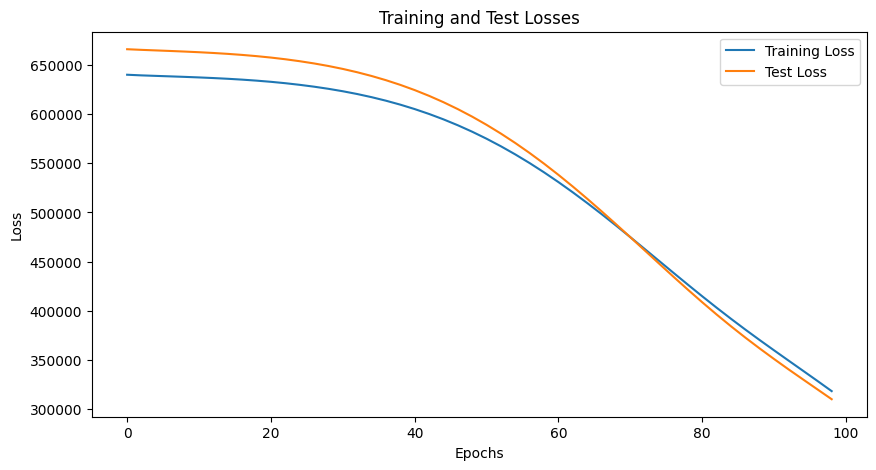

In [362]:
#cubic function
train_model('cubic',input_size=1,hidden_size1=12,hidden_size2=12)

0
Target: -0.2883836627006531, Model output: -0.176552414894104
Target: -0.8934328556060791, Model output: 0.2894786298274994
Target: 0.9330601692199707, Model output: 0.3693851828575134
Target: 0.4402163624763489, Model output: 0.20259369909763336
Target: 0.013302084989845753, Model output: 0.2596833407878876
-----------------------------------------------------------------------------------
2
Target: 0.14000147581100464, Model output: 0.05678301304578781
Target: -0.3410869836807251, Model output: 0.05498180538415909
Target: 0.8716439008712769, Model output: 0.18530237674713135
Target: 0.5381833910942078, Model output: 0.16263052821159363
Target: 0.04245751351118088, Model output: 0.04452630132436752
-----------------------------------------------------------------------------------
4
Target: 0.9330601692199707, Model output: -0.029087692499160767
Target: 0.013302084989845753, Model output: 0.06949583441019058
Target: 0.13006095588207245, Model output: 0.12526798248291016
Target: 0.93

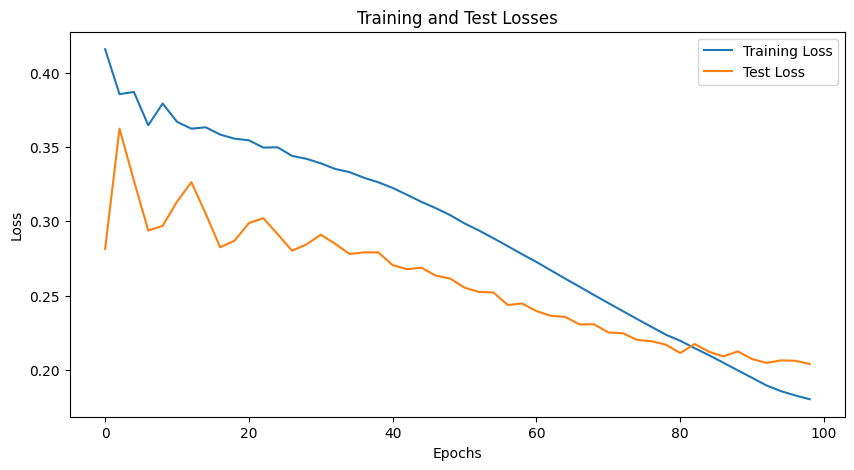

In [363]:
#sin function
train_model('sin',input_size=1,hidden_size1=12,hidden_size2=12)


0
Target: 2.482919692993164, Model output: -0.5633199214935303
Target: 2.581958055496216, Model output: 0.12693604826927185
Target: 0.7179715037345886, Model output: 0.2267225831747055
Target: 0.48582759499549866, Model output: 0.19588622450828552
Target: 1.084428071975708, Model output: -0.9922003746032715
-----------------------------------------------------------------------------------
2
Target: 0.4849216341972351, Model output: -0.08725899457931519
Target: 1.9463454484939575, Model output: -0.3027898967266083
Target: 0.3688731789588928, Model output: -0.034395456314086914
Target: 0.7264556884765625, Model output: -0.12007933855056763
Target: 2.1523966789245605, Model output: 0.2721921503543854
-----------------------------------------------------------------------------------
4
Target: 0.40544310212135315, Model output: 0.032211512327194214
Target: 0.48582759499549866, Model output: 0.338979572057724
Target: 2.581958055496216, Model output: 0.3223464787006378
Target: 2.58195805549

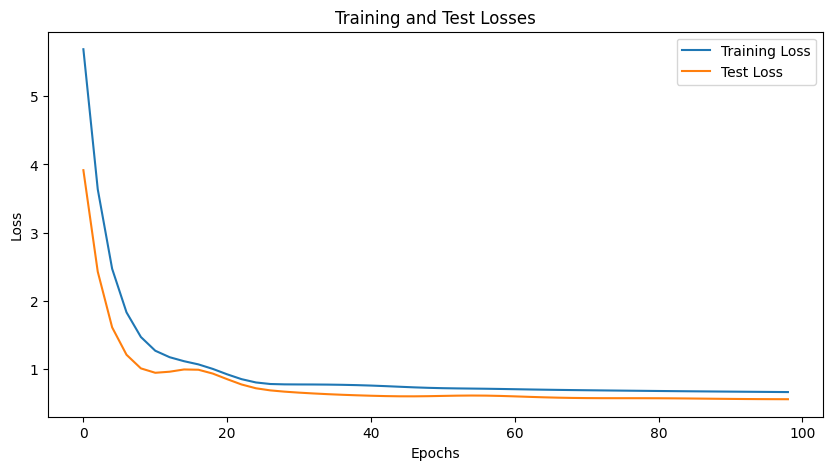

In [364]:
#exponential function
train_model('exp_sin',input_size=1,hidden_size1=12,hidden_size2=12)


0
Target: 2.2165822982788086, Model output: 0.24049517512321472
Target: 9.108457565307617, Model output: -2.531609535217285
Target: 2.2165822982788086, Model output: 0.24049517512321472
Target: 8.063636779785156, Model output: -2.2108113765716553
Target: 0.38287878036499023, Model output: 0.1857500523328781
-----------------------------------------------------------------------------------
2
Target: 8.56805419921875, Model output: -0.9046643972396851
Target: 3.814399242401123, Model output: -0.23107033967971802
Target: 1.1427593231201172, Model output: 0.13313430547714233
Target: 8.063636779785156, Model output: -0.8331882953643799
Target: 0.38287878036499023, Model output: 0.2581774592399597
-----------------------------------------------------------------------------------
4
Target: 8.499847412109375, Model output: 0.6426011919975281
Target: 8.063636779785156, Model output: -0.09843388199806213
Target: 9.108457565307617, Model output: -0.1703314483165741
Target: 7.051797866821289, Mo

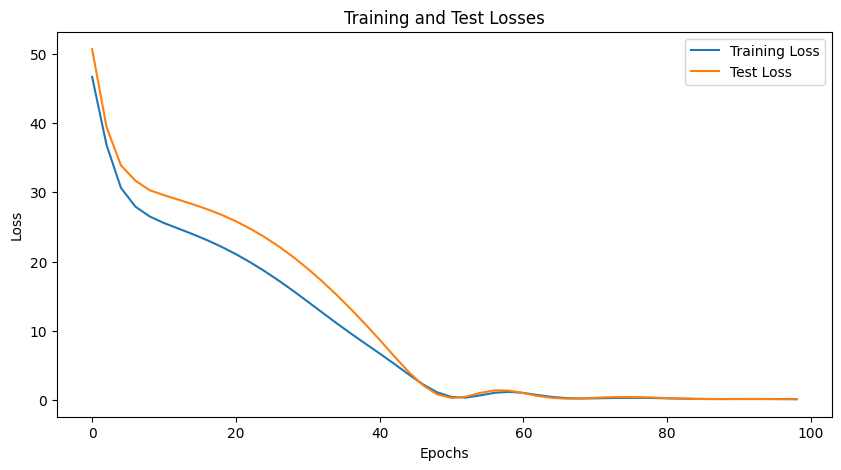

In [365]:
#absolute function
train_model('abs',input_size=1,hidden_size1=12,hidden_size2=12)

## Function approximation 2D


0
Target: 12788.853515625, Model output: 4.240243911743164
Target: 3377.03076171875, Model output: 2.6856963634490967
Target: 387.5124206542969, Model output: 1.556091547012329
Target: 10409.001953125, Model output: 3.896562099456787
Target: 10409.001953125, Model output: 3.896562099456787
-----------------------------------------------------------------------------------
2
Target: 8108.5546875, Model output: 5.716063022613525
Target: 387.5124206542969, Model output: 2.356123924255371
Target: 8108.5546875, Model output: 5.716063022613525
Target: 387.5124206542969, Model output: 2.356123924255371
Target: 8108.5546875, Model output: 5.716063022613525
-----------------------------------------------------------------------------------
4
Target: 501.31878662109375, Model output: 4.133254528045654
Target: 3089.6005859375, Model output: 5.888655662536621
Target: 700.3840942382812, Model output: 5.141457557678223
Target: 6679.22802734375, Model output: 7.491787910461426
Target: 3179.0241699218

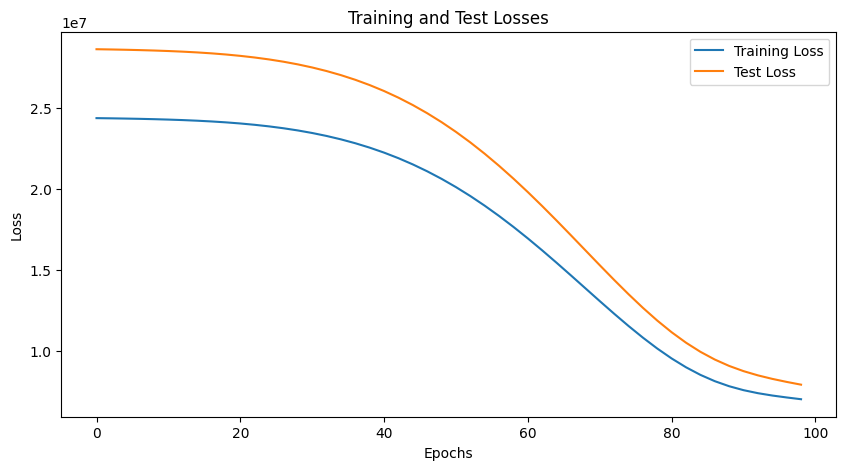

In [366]:
#cubic function
train_model('cubic',input_size=2,hidden_size1=12,hidden_size2=12)

0
Target: 0.29033592343330383, Model output: 0.753150463104248
Target: -0.7158554196357727, Model output: 0.6588894128799438
Target: 0.9860816597938538, Model output: 0.7800427079200745
Target: -0.7104437947273254, Model output: 0.7108765840530396
Target: -0.6165728569030762, Model output: 0.9841985702514648
-----------------------------------------------------------------------------------
2
Target: -0.10961771756410599, Model output: 0.41669753193855286
Target: -0.5241362452507019, Model output: 0.6338134407997131
Target: -0.39256274700164795, Model output: 0.3550553321838379
Target: -0.6165728569030762, Model output: 0.19213521480560303
Target: -0.9986704587936401, Model output: 0.2876523733139038
-----------------------------------------------------------------------------------
4
Target: -0.7158554196357727, Model output: -0.6663066148757935
Target: -0.6165728569030762, Model output: -0.4979974031448364
Target: 0.9860816597938538, Model output: 0.04531185328960419
Target: -0.58766

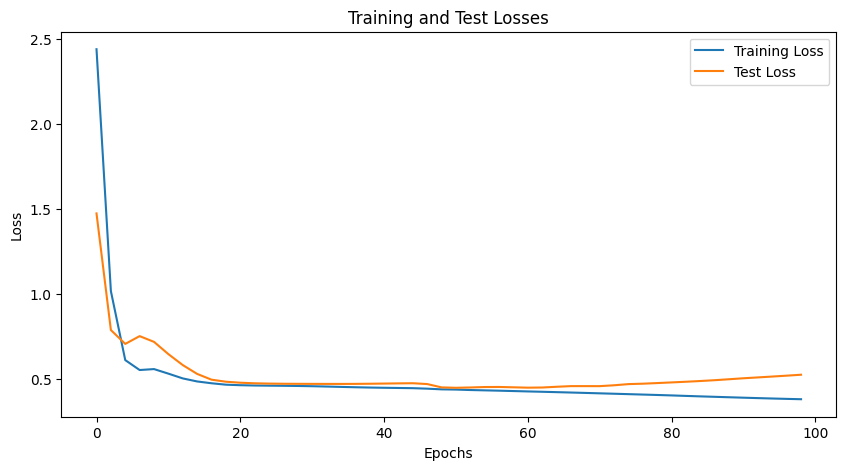

In [367]:
#sin function
train_model('sin',input_size=2,hidden_size1=12,hidden_size2=12)

0
Target: 2.492133378982544, Model output: -0.07218319177627563
Target: 0.6020222902297974, Model output: 0.009101063013076782
Target: 0.48367682099342346, Model output: 1.160325050354004
Target: 4.361441612243652, Model output: 0.11994346976280212
Target: 0.6020222902297974, Model output: 0.009101063013076782
-----------------------------------------------------------------------------------
2
Target: 4.7946391105651855, Model output: 1.1166256666183472
Target: 0.8314128518104553, Model output: 0.8408247828483582
Target: 0.21323151886463165, Model output: 0.6548676490783691
Target: 1.295880675315857, Model output: 0.9811012744903564
Target: 1.295880675315857, Model output: 0.9811012744903564
-----------------------------------------------------------------------------------
4
Target: 2.619804859161377, Model output: 2.2881364822387695
Target: 0.21323151886463165, Model output: 0.9908484220504761
Target: 0.2035617232322693, Model output: 2.923471212387085
Target: 2.492133378982544, Mod

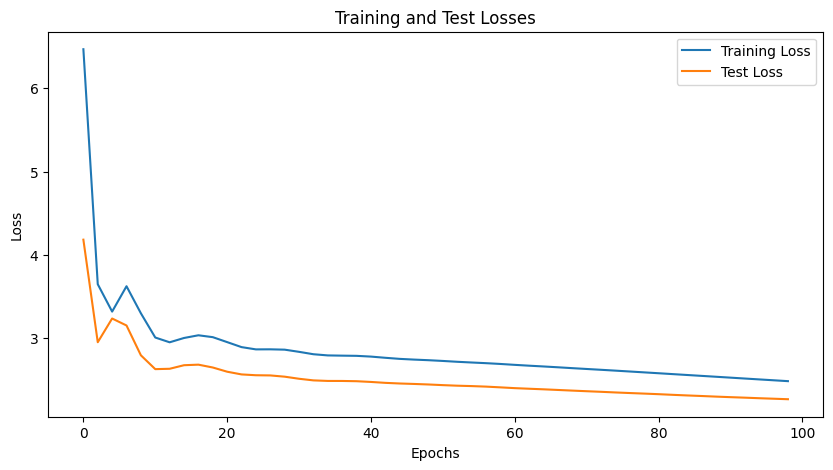

In [368]:
#exponential function
train_model('exp_sin',input_size=2,hidden_size1=12,hidden_size2=12)

0
Target: 24.006793975830078, Model output: 1.778942584991455
Target: 31.701492309570312, Model output: 2.183946132659912
Target: 12.723814964294434, Model output: 0.59073805809021
Target: 11.91340160369873, Model output: 0.5513027906417847
Target: 9.79664421081543, Model output: 0.5019776821136475
-----------------------------------------------------------------------------------
2
Target: 12.909893035888672, Model output: 0.9552682638168335
Target: 19.612018585205078, Model output: 2.3117921352386475
Target: 6.6689653396606445, Model output: 1.0631954669952393
Target: 19.612018585205078, Model output: 2.3117921352386475
Target: 31.701492309570312, Model output: 4.024618625640869
-----------------------------------------------------------------------------------
4
Target: 24.006793975830078, Model output: 5.200015544891357
Target: 12.723814964294434, Model output: 1.9761078357696533
Target: 23.526901245117188, Model output: 3.6337902545928955
Target: 27.386333465576172, Model output: 

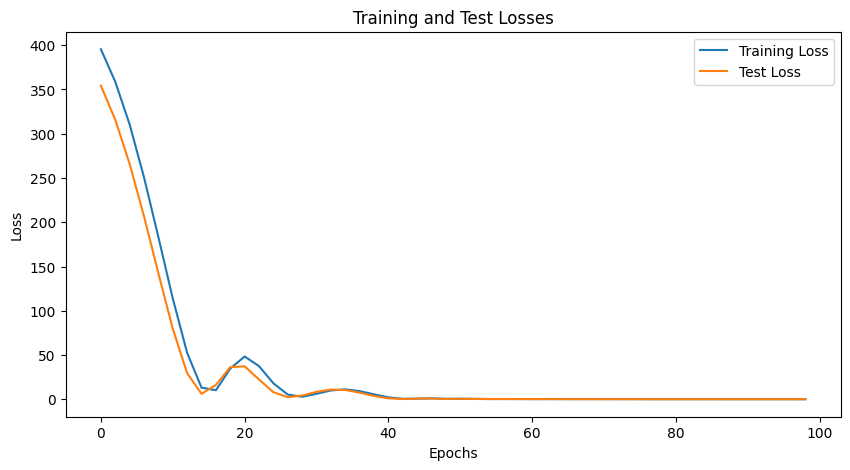

In [369]:
#absolute function
train_model('abs',input_size=2,hidden_size1=12,hidden_size2=12)

In [ ]:
# Modules to be loaded and used
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"

import torch
from torch import nn
import math
from functools import partial
from pathlib import Path
from tqdm import tqdm
import rich
from typing import List, Tuple, Optional, Dict, Any
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import transformers
import tokenizers
import datasets
import zipfile
from huggingface_hub import hf_hub_download

from __future__ import division
from __future__ import print_function

import numpy as np
import deepxde as dde
from deepxde.backend import tf
from scipy.integrate import odeint
import re

import sys
sys.path.append('/content')
import functions

1. a) Polynomial


Compiling model...
Building feed-forward neural network...
'build' took 0.084696 s

'compile' took 2.586962 s

Training model...

Step      Train loss    Test loss     Test metric   
0         [2.05e+11]    [1.52e+11]    [1.00e+00]    
1000      [3.46e+10]    [2.54e+10]    [4.08e-01]    
2000      [3.21e+10]    [2.58e+10]    [4.12e-01]    
3000      [3.16e+10]    [2.55e+10]    [4.09e-01]    
4000      [3.12e+10]    [2.51e+10]    [4.06e-01]    
5000      [3.07e+10]    [2.47e+10]    [4.03e-01]    
6000      [3.00e+10]    [2.41e+10]    [3.98e-01]    
7000      [2.80e+10]    [2.24e+10]    [3.83e-01]    
8000      [1.98e+10]    [1.53e+10]    [3.17e-01]    
9000      [8.96e+09]    [6.51e+09]    [2.07e-01]    
10000     [3.12e+09]    [2.09e+09]    [1.17e-01]    
11000     [9.76e+08]    [6.20e+08]    [6.38e-02]    
12000     [3.08e+08]    [1.97e+08]    [3.60e-02]    
13000     [1.05e+08]    [8.78e+07]    [2.40e-02]    
14000     [4.02e+07]    [4.43e+07]    [1.71e-02]    
15000     [1.41e+07]  

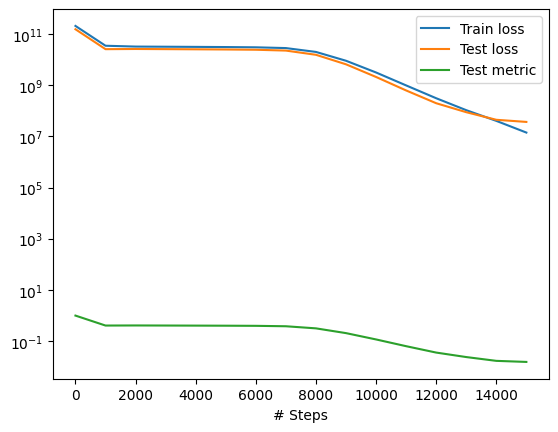

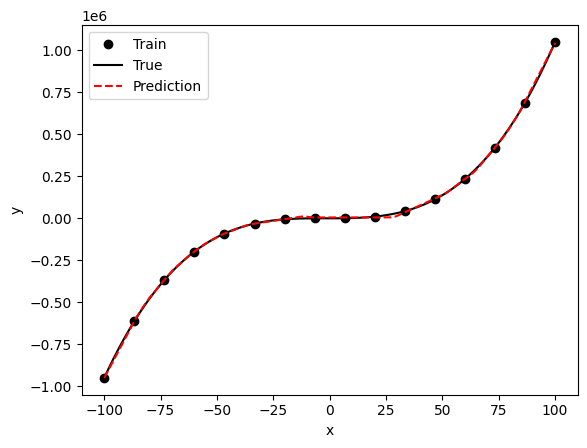

In [ ]:
import deepxde as dde
import numpy as np

a=1
b=5
c=1

geom = dde.geometry.Interval(-100, 100)
num_train = 16
num_test = 100
data = dde.data.Function(geom, lambda x : a*x**3+b*x**2+c*x , num_train, num_test)

activation = "relu"
initializer = "Glorot uniform"
net = dde.nn.FNN([1] + [20] * 3 + [1], activation, initializer)

model = dde.Model(data, net)
model.compile("adam", lr=0.001, metrics=["l2 relative error"])
losshistory, train_state = model.train(iterations=15000)

dde.saveplot(losshistory, train_state, issave=True, isplot=True)

Implementation of an FNN in DeepXDE for a given dataset

Compiling model...
Building feed-forward neural network...
'build' took 0.076844 s



/usr/local/lib/python3.10/dist-packages/deepxde/nn/tensorflow_compat_v1/fnn.py:116: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(


'compile' took 0.723378 s

Training model...

Step      Train loss    Test loss     Test metric   
0         [5.73e-01]    [4.99e-01]    [1.00e+00]    
1000      [2.88e-02]    [1.01e+00]    [1.42e+00]    
2000      [2.38e-02]    [9.72e-01]    [1.40e+00]    
3000      [9.99e-03]    [9.99e-01]    [1.42e+00]    
4000      [5.16e-04]    [1.02e+00]    [1.43e+00]    
5000      [4.90e-05]    [1.02e+00]    [1.44e+00]    
6000      [9.47e-05]    [1.02e+00]    [1.43e+00]    
7000      [2.13e-05]    [1.02e+00]    [1.43e+00]    
8000      [1.50e-05]    [1.02e+00]    [1.43e+00]    
9000      [8.96e-06]    [1.01e+00]    [1.43e+00]    
10000     [7.89e-06]    [1.01e+00]    [1.43e+00]    

Best model at step 10000:
  train loss: 7.89e-06
  test loss: 1.01e+00
  test metric: [1.43e+00]

'train' took 10.322943 s

Saving loss history to /content/loss.dat ...
Saving training data to /content/train.dat ...
Saving test data to /content/test.dat ...


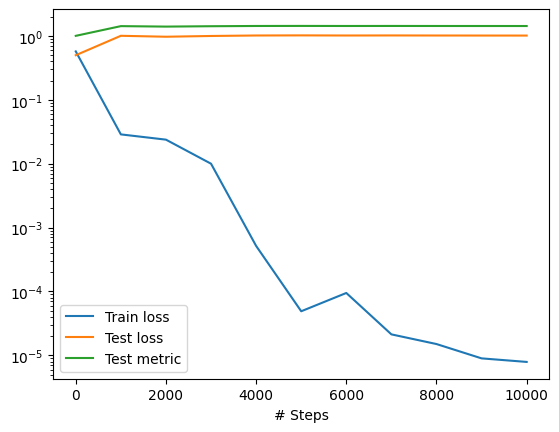

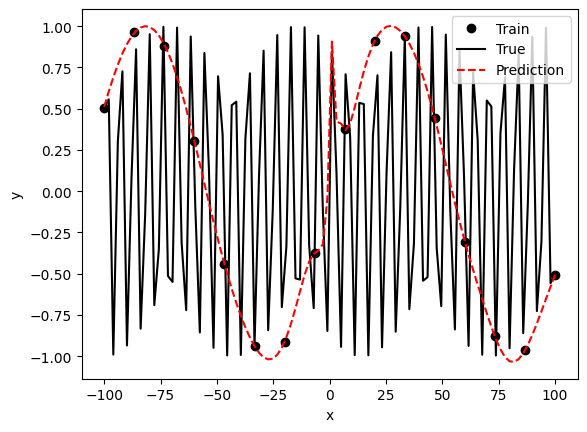

In [ ]:
geom = dde.geometry.Interval(-100, 100)
num_train = 16
num_test = 100
data = dde.data.Function(geom, lambda x: np.sin(x), num_train, num_test)

activation = "tanh"
initializer = "Glorot uniform"
net = dde.nn.FNN([1] + [20] * 3 + [1], activation, initializer)

model = dde.Model(data, net)
model.compile("adam", lr=0.001, metrics=["l2 relative error"])
losshistory, train_state = model.train(iterations=10000)

dde.saveplot(losshistory, train_state, issave=True, isplot=True)

Compiling model...
Building feed-forward neural network...
'build' took 0.086467 s



/usr/local/lib/python3.10/dist-packages/deepxde/nn/tensorflow_compat_v1/fnn.py:116: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(


'compile' took 0.745739 s

Training model...

Step      Train loss    Test loss     Test metric   
0         [3.38e+03]    [3.40e+03]    [1.00e+00]    
1000      [1.30e+03]    [1.32e+03]    [6.23e-01]    
2000      [6.15e+02]    [6.25e+02]    [4.29e-01]    
3000      [2.80e+02]    [2.86e+02]    [2.90e-01]    
4000      [1.19e+02]    [1.22e+02]    [1.90e-01]    
5000      [4.62e+01]    [4.82e+01]    [1.19e-01]    
6000      [1.63e+01]    [1.73e+01]    [7.14e-02]    
7000      [5.26e+00]    [5.73e+00]    [4.11e-02]    
8000      [1.57e+00]    [1.78e+00]    [2.29e-02]    
9000      [4.63e-01]    [5.49e-01]    [1.27e-02]    
10000     [1.49e-01]    [1.84e-01]    [7.35e-03]    

Best model at step 10000:
  train loss: 1.49e-01
  test loss: 1.84e-01
  test metric: [7.35e-03]

'train' took 11.980773 s

Saving loss history to /content/loss.dat ...
Saving training data to /content/train.dat ...
Saving test data to /content/test.dat ...


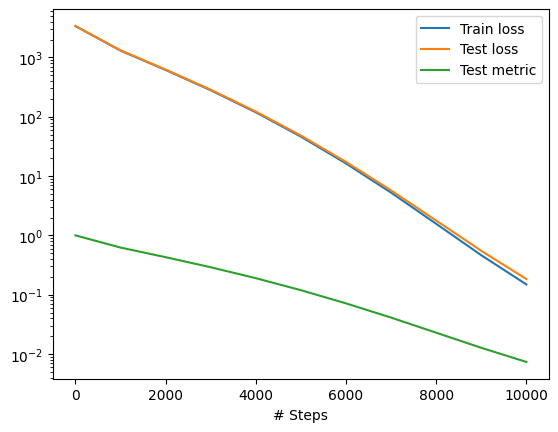

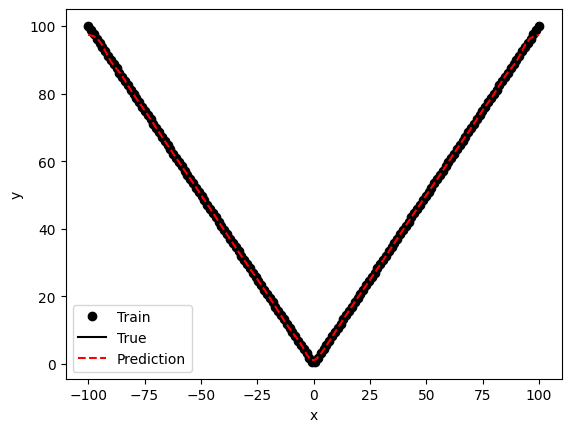

In [ ]:
import deepxde as dde
import numpy as np

geom = dde.geometry.Interval(-100, 100)
num_train = 160
num_test = 100
data = dde.data.Function(geom, lambda x: abs(x) , num_train, num_test)

activation = "tanh"
initializer = "Glorot uniform"
net = dde.nn.FNN([1] + [20] * 3 + [1], activation, initializer)

model = dde.Model(data, net)
model.compile("adam", lr=0.001, metrics=["l2 relative error"])
losshistory, train_state = model.train(iterations=10000)

dde.saveplot(losshistory, train_state, issave=True, isplot=True)

In [ ]:
geom = dde.geometry.Interval(-10, 10)
num_train = 16
num_test = 100
data = dde.data.Function(geom, lambda x: np.exp(x) , num_train, num_test)

activation = "tanh"
initializer = "Glorot uniform"
net = dde.nn.FNN([2] + [20] * 3 + [1], activation, initializer)

model = dde.Model(data, net)
model.compile("adam", lr=0.001, metrics=["l2 relative error"])
losshistory, train_state = model.train(iterations=10000)

dde.saveplot(losshistory, train_state, issave=True, isplot=True)

Compiling model...
Building feed-forward neural network...
'build' took 0.117982 s



/usr/local/lib/python3.10/dist-packages/deepxde/nn/tensorflow_compat_v1/fnn.py:116: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(


'compile' took 2.624651 s

Training model...



AttributeError: ignored

In [ ]:
geom = dde.geometry.Rectangle(xmin=[0,0],xmax=[2,2])
num_train = 16
num_test = 100
data = dde.data.Function(geom, lambda x, y : x * y , num_train, num_test)

activation = "relu"
initializer = "Glorot uniform"
net = dde.nn.FNN([2] + [20] * 3 + [1], activation, initializer)

model = dde.Model(data, net)
model.compile("adam", lr=0.001, metrics=["l2 relative error"])
losshistory, train_state = model.train(iterations=5000)

dde.saveplot(losshistory, train_state, issave=True, isplot=True)

Compiling model...
Building feed-forward neural network...
'build' took 0.074445 s

'compile' took 2.498599 s

Training model...



TypeError: ignored